In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn import model_selection
from sklearn.metrics import classification_report 
%matplotlib inline
%run utilities.ipynb

In [4]:
input_file = 'data_imbalance.txt' 
data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1]

In [5]:
class_0 = np.array(X[y==0]) 
class_1 = np.array(X[y==1])

C:\Users\int2h\AppData\Local\Temp\ipykernel_22884\2905858367.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


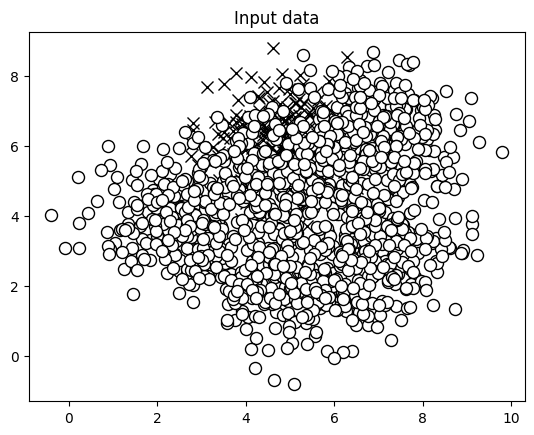

In [6]:
plt.figure() 
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
            edgecolors='black', linewidth=1, marker='x') 
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
            edgecolors='black', linewidth=1, marker='o') 
plt.title('Input data') 
plt.show()

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5) 

In [13]:
xparams = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0,
           'class_weight': 'balanced'
          }

In [14]:
classifier = ExtraTreesClassifier(**xparams) 
classifier.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=4, random_state=0)

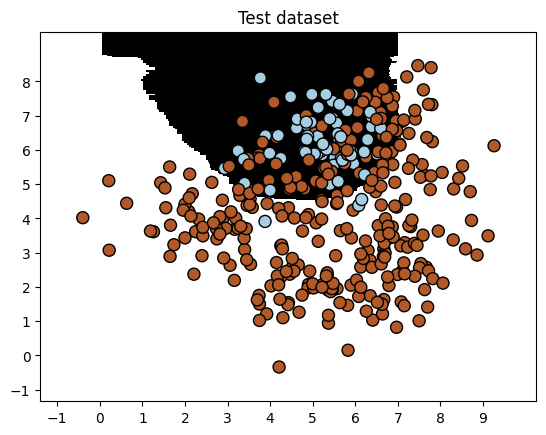

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375



In [15]:
y_test_pred = classifier.predict(X_test) 
visualize_classifier(classifier, X_test, y_test, 'Test dataset') 
class_names = ['Class-0', 'Class-1'] 
print("Classifier performance on test dataset\n") 
print(classification_report(y_test, y_test_pred, target_names=class_names)) 